In [35]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [36]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h), bias_layer_1))

w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w), bias_layer_2))

output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
bias_output = tf.Variable(tf.random_normal([n_classes]))
output_layer = tf.matmul(layer_2, output) + bias_output

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_layer))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [37]:
avg_set = []
epoch_set = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
            avg_cost += sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})
            
        if epoch % display_step == 0:
            print('Epoch: %04d cost= %.9f' %((epoch+1), avg_cost))
        
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished\n")

    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model Accuracy: %.2f" % sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

Epoch: 0001 cost= 910.397038132
Epoch: 0002 cost= 291.087703899
Epoch: 0003 cost= 198.055790789
Epoch: 0004 cost= 147.718670554
Epoch: 0005 cost= 113.766929235
Epoch: 0006 cost= 89.419994190
Epoch: 0007 cost= 70.189589592
Epoch: 0008 cost= 56.127922222
Epoch: 0009 cost= 44.450231314
Epoch: 0010 cost= 35.593687370
Epoch: 0011 cost= 28.008400462
Epoch: 0012 cost= 22.272984296
Epoch: 0013 cost= 17.408898772
Epoch: 0014 cost= 13.752260436
Epoch: 0015 cost= 10.906764838
Epoch: 0016 cost= 8.413279193
Epoch: 0017 cost= 6.534561981
Epoch: 0018 cost= 5.202027982
Epoch: 0019 cost= 3.975880836
Epoch: 0020 cost= 3.141691570
Training phase finished

Model Accuracy: 0.95


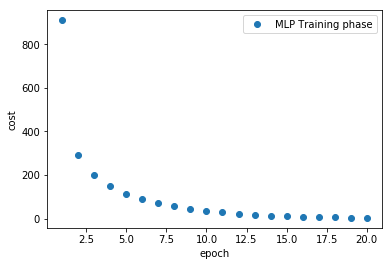

In [38]:
plt.plot(epoch_set, avg_set, 'o', label='MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()